<a href="https://colab.research.google.com/github/joaorihan/Dynamic-Programming/blob/main/fiap/checkpoints/CP2/CP2_DYNPROG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este Notebook versa sobre desenvolviemnto do Monte Carlo em relação a empresa NVIDIA**

Grupo:
Rodrigo Fernandes Serafim |
João Antonio Rihan |
Fernando Popolili |
Matheus Zanardi |

### Importação bibliotecas

In [3]:
import pandas as pd # importando a biblioteca pandas
from datetime import datetime # importando a biblioteca datetime
import numpy as np # importando a biblioteca numpy
import matplotlib.pyplot as plt # importando a biblioteca matplotlib
import seaborn as sns # importando a biblioteca seaborn

### Parâmetros técnicos

In [4]:
# Load the NVIDIA stock data from the CSV file (adjusted close)
stock_data = pd.read_csv('NVDA.csv', parse_dates=['Date'], index_col='Date')

# Filter the data for the range 2022-01-01 to 2024-01-01
filtered_data = stock_data.loc['2022-01-01':'2024-01-01']

# Generate the simulations (this is a placeholder, since the actual simulation logic is not provided)
n_dias = len(filtered_data)
n_simulacoes = 15
media = filtered_data['Adj Close'].mean()
desvio_padrao = filtered_data['Adj Close'].std()


### Definição de funções

In [5]:
# Define uma função para calcular a média móvel de uma série de dados
# 'series' é a série de dados que será usada (como uma coluna de um DataFrame)
# 'n' é o número de períodos que serão considerados na média móvel
def moving_average(series, n):
    # Utiliza o método 'rolling' para calcular a média móvel, onde 'window=n' define o tamanho da janela
    # 'mean()' calcula a média para cada janela de 'n' períodos
    return series.rolling(window=n).mean()


In [6]:
# Define uma função para realizar simulações de Monte Carlo
# 'media' é a média dos retornos ou valores que estamos simulando
# 'desvio_padrao' é o desvio padrão dos retornos ou valores, indicando a volatilidade
# 'n_simulacoes' é o número de simulações independentes que serão realizadas
# 'n_dias' é o número de dias ou períodos para os quais faremos a previsão em cada simulação
def monte_carlo_simulation(media, desvio_padrao, n_simulacoes, n_dias):
    return pd.DataFrame({i: pd.Series(media + desvio_padrao * pd.Series(np.random.randn(n_dias)).cumsum())
                         for i in range(n_simulacoes)})


In [7]:
# Define uma função para calcular o MAPE (Mean Absolute Percentage Error)
# 'real' é a série com os valores reais observados
# 'previsao' é a série com os valores previstos
def mape(real, previsao):

    # Calcula o erro percentual absoluto para cada ponto: (valor real - previsão) / valor real
    # Em seguida, calcula a média desses valores absolutos e multiplica por 100 para converter para porcentagem
    return np.mean(np.abs((real - previsao) / real)) * 100


### Simulações

Digite o número de dias a serem simulados: 100


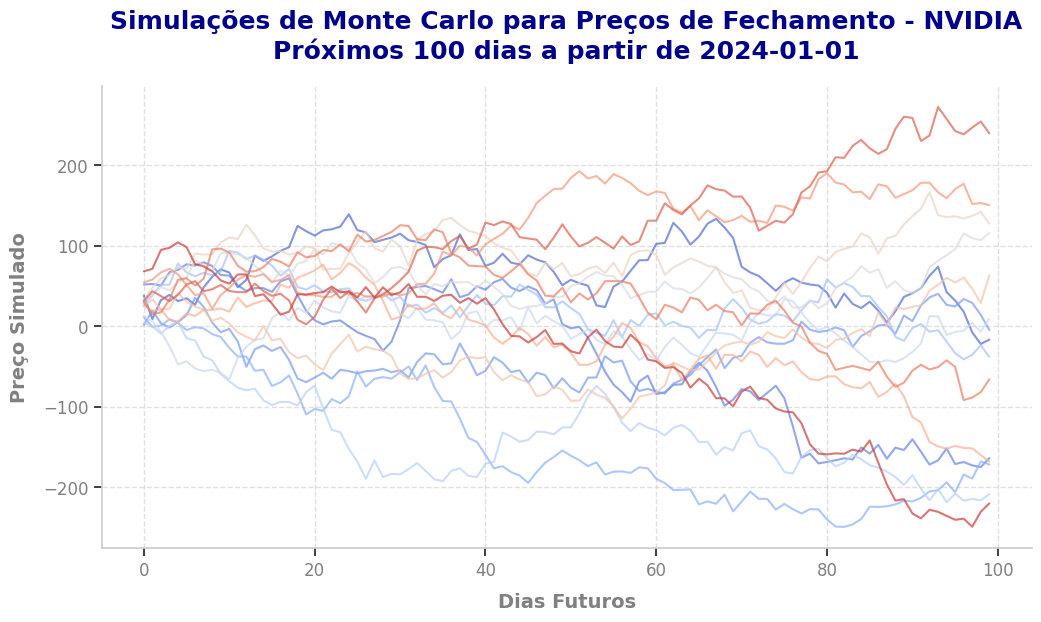

In [21]:
# Gerar as simulações

n_dias_simulados = int(input("Digite o número de dias a serem simulados: "))

simulacoes = monte_carlo_simulation(media, desvio_padrao, n_simulacoes, n_dias_simulados)

# Configurações de estilo com Seaborn
sns.set(style="whitegrid")

# Criar uma figura para o gráfico
plt.figure(figsize=(12,6))

# Escolher uma paleta de cores mais suave (por exemplo, "coolwarm" ou "viridis")
palette = sns.color_palette("coolwarm", n_colors=n_simulacoes)

# Plotar cada simulação com uma cor da paleta e mais ajustes visuais
for i in range(n_simulacoes):
    sns.lineplot(x=np.arange(n_dias_simulados), y=simulacoes[i], lw=1.5, alpha=0.7, color=palette[i])

# Ajustes de título e eixos
plt.title('Simulações de Monte Carlo para Preços de Fechamento - NVIDIA\nPróximos ' + str(n_dias_simulados) +' dias a partir de 2024-01-01', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Dias Futuros', fontsize=14, fontweight='bold', labelpad=10, color='gray')
plt.ylabel('Preço Simulado', fontsize=14, fontweight='bold', labelpad=10, color='gray')

# Melhorar a grade e remover os ticks superiores e da direita
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(left=True, bottom=True, labelsize=12, labelcolor='gray')

# Definir um fundo mais neutro e remover os spines laterais
sns.despine()

# Mostrar o gráfico
plt.show()


### Erros

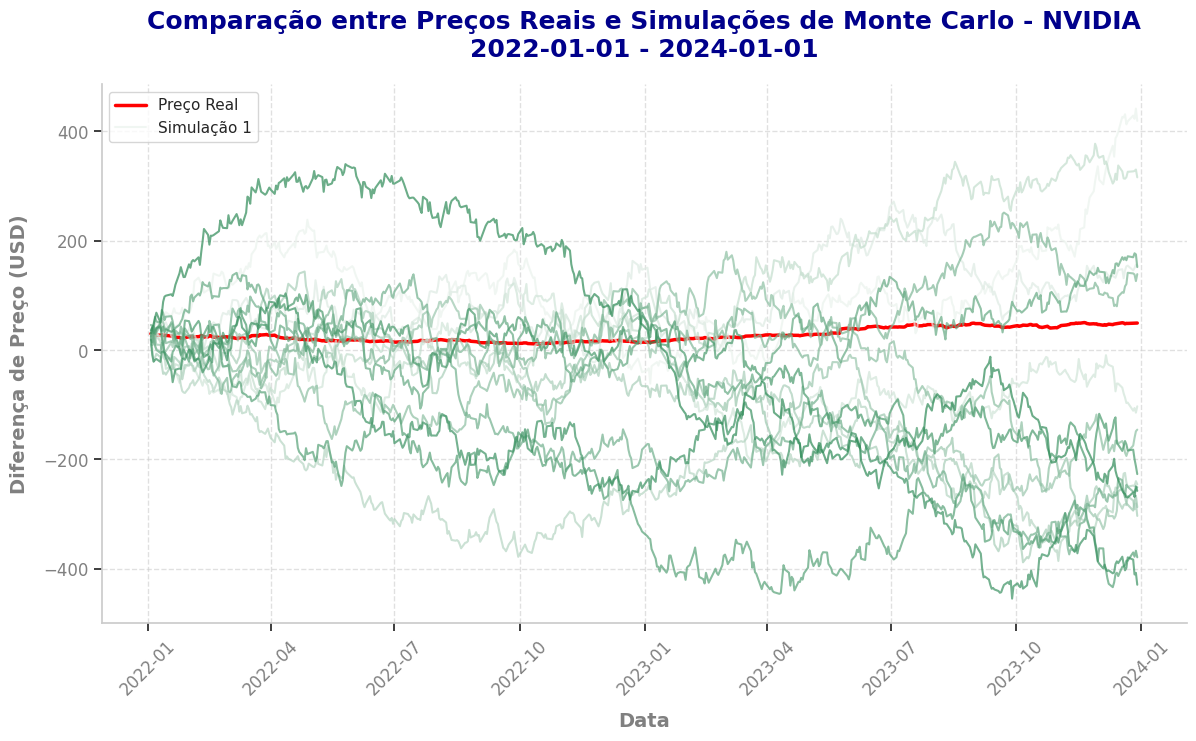

In [14]:
# Generate the simulations
simulacoes = monte_carlo_simulation(media, desvio_padrao, n_simulacoes, n_dias)

# Seaborn styling for the plot
sns.set(style="whitegrid")

# Create the figure for the plot
plt.figure(figsize=(14, 7))

# Plot the real stock prices
sns.lineplot(x=filtered_data.index, y=filtered_data['Adj Close'], label='Preço Real', color='red', lw=2.5)

# Plot the Monte Carlo simulations
palette = sns.light_palette("seagreen", n_colors=n_simulacoes)
for i in range(n_simulacoes):
    sns.lineplot(x=filtered_data.index, y=simulacoes[i], lw=1.5, alpha=0.7, color=palette[i], label=f'Simulação {i+1}' if i == 0 else "")

# Customize title and labels
plt.title('Comparação entre Preços Reais e Simulações de Monte Carlo - NVIDIA\n2022-01-01 - 2024-01-01', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Data', fontsize=14, fontweight='bold', labelpad=10, color='gray')
plt.ylabel('Diferença de Preço (USD)', fontsize=14, fontweight='bold', labelpad=10, color='gray')

# Better grid and no side spines
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(left=True, bottom=True, labelsize=12, labelcolor='gray')
sns.despine()

# Show the plot
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [10]:
# Calcular a média e o desvio padrão dos preços de fechamento ajustados
mean_close = filtered_data['Adj Close'].mean()
std_close = filtered_data['Adj Close'].std()

# Definir o número de simulações e o horizonte de previsão
n_simulations = 1000
n_days = len(filtered_data)

# Gerar simulações de Monte Carlo baseadas na média e desvio padrão
simulated_prices = np.random.normal(mean_close, std_close, (n_simulations, n_days))

# Calcular o erro médio absoluto percentual (MAPE)
real_prices = filtered_data['Adj Close'].values

# Evitar divisão por zero
real_prices_safe = np.where(real_prices == 0, np.nan, real_prices)

# Calcular o MAPE para cada simulação
mape = np.mean(np.abs((simulated_prices - real_prices_safe) / real_prices_safe), axis=1) * 100

# Média do MAPE de todas as simulações
mean_mape = np.nanmean(mape)

print(f"Media: {mean_close}\nDesvio padrão: {std_close}\nMedia do MAPE: {mean_mape}")

Media: 27.53462123952096
Desvio padrão: 12.231428300652558
Media do MAPE: 59.83568248771544


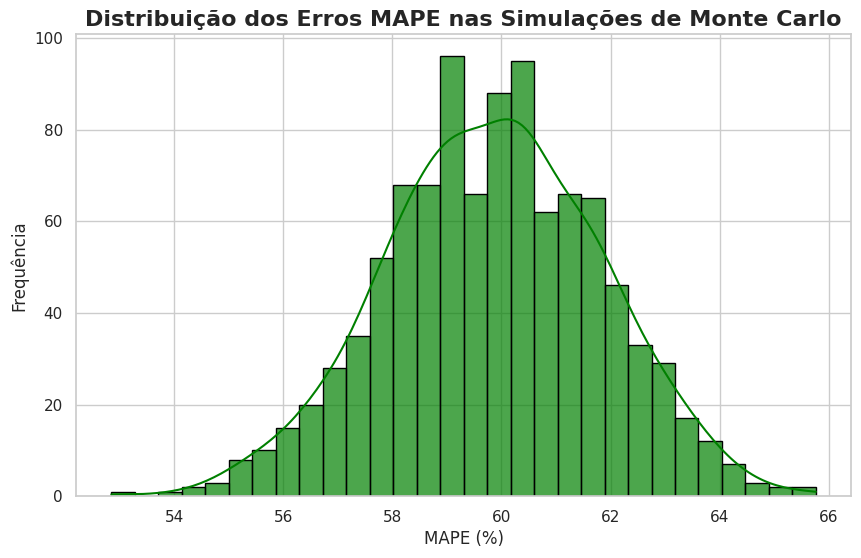

In [11]:
# Criar um gráfico de distribuição dos erros MAPE utilizando Seaborn
plt.figure(figsize=(10,6))
sns.histplot(mape, bins=30, color="green", kde=True, edgecolor='black', alpha=0.7)
# Ajustes do gráfico
plt.title('Distribuição dos Erros MAPE nas Simulações de Monte Carlo', fontsize=16, fontweight='bold')
plt.xlabel('MAPE (%)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)

# Exibir o gráfico
plt.show()


## Conclusão:

A abordagem baseada em Monte Carlo permite explorar a incerteza nos dados e testar diversas variações de cenários econômicos. A análise demonstra a importância da simulação estocástica na previsão de indicadores, fornecendo estimativas robustas do MAPE para avaliar a acurácia do modelo. Além disso, a utilização de histogramas para visualizar a distribuição dos erros oferece uma compreensão adicional da performance do modelo de previsão, ajudando a identificar possíveis ajustes para melhorar a precisão.